<a href="https://colab.research.google.com/github/girlwcode/21-1_machineLearning/blob/main/Imdb_RNN%2CLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Dataset and module
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [ ]:
len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


In [ ]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


# preprocessing
# 단어의 집합을 10000개로 제한
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

# 리뷰 길이를 500으로 제한 - 모델 처리를 위해, 모든 데이터 크기 동일하게 만듦
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
# Layer 1개일 때, RNN
import time

# 시작 시간
start_time = time.time()

# 100차원의 임베딩 차원
# 128개의 unit
embedding_dim = 100
hidden_units = 128
epochs = 10

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('RNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=epochs, callbacks=[es, mc], batch_size=60, validation_split=0.2)

print("--- %s seconds ---" %(time.time() - start_time))

Epoch 1/10
334/334 [==============================] - ETA: 0s - loss: 0.6552 - acc: 0.5869
Epoch 00001: val_acc improved from -inf to 0.76940, saving model to RNN_model.h5
334/334 [==============================] - 105s 310ms/step - loss: 0.6552 - acc: 0.5869 - val_loss: 0.4909 - val_acc: 0.7694
Epoch 2/10
334/334 [==============================] - ETA: 0s - loss: 0.4514 - acc: 0.7986
Epoch 00002: val_acc improved from 0.76940 to 0.80600, saving model to RNN_model.h5
334/334 [==============================] - 103s 309ms/step - loss: 0.4514 - acc: 0.7986 - val_loss: 0.4505 - val_acc: 0.8060
Epoch 3/10
334/334 [==============================] - ETA: 0s - loss: 0.3838 - acc: 0.8397
Epoch 00003: val_acc improved from 0.80600 to 0.82680, saving model to RNN_model.h5
334/334 [==============================] - 103s 309ms/step - loss: 0.3838 - acc: 0.8397 - val_loss: 0.4316 - val_acc: 0.8268
Epoch 4/10
334/334 [==============================] - ETA: 0s - loss: 0.3716 - acc: 0.8454
Epoch 00004:

In [ ]:
loaded_model = load_model('RNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 43s 55ms/step - loss: 0.4364 - acc: 0.8193

 테스트 정확도: 0.8193


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
# Layer 1개일 때, LSTM
import time

# 시작 시간
start_time = time.time()

# 100차원의 임베딩 차원
# 128개의 unit
embedding_dim = 100
hidden_units = 128
epochs = 10

accuracy=[]
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('LSTM_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=epochs, callbacks=[es, mc], batch_size=60, validation_split=0.2)

print("--- %s seconds ---" %(time.time() - start_time))

Epoch 1/10
334/334 [==============================] - ETA: 0s - loss: 0.4867 - acc: 0.7713
Epoch 00001: val_acc improved from -inf to 0.84840, saving model to LSTM_model.h5
334/334 [==============================] - 400s 1s/step - loss: 0.4867 - acc: 0.7713 - val_loss: 0.3622 - val_acc: 0.8484
Epoch 2/10
334/334 [==============================] - ETA: 0s - loss: 0.3028 - acc: 0.8821
Epoch 00002: val_acc improved from 0.84840 to 0.87860, saving model to LSTM_model.h5
334/334 [==============================] - 398s 1s/step - loss: 0.3028 - acc: 0.8821 - val_loss: 0.3030 - val_acc: 0.8786
Epoch 3/10
334/334 [==============================] - ETA: 0s - loss: 0.2449 - acc: 0.9067
Epoch 00003: val_acc improved from 0.87860 to 0.88840, saving model to LSTM_model.h5
334/334 [==============================] - 391s 1s/step - loss: 0.2449 - acc: 0.9067 - val_loss: 0.2922 - val_acc: 0.8884
Epoch 4/10
334/334 [==============================] - ETA: 0s - loss: 0.2061 - acc: 0.9237
Epoch 00004: val_a

In [ ]:
loaded_model = load_model('LSTM_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 116s 148ms/step - loss: 0.3667 - acc: 0.8697

 테스트 정확도: 0.8697


In [ ]:
## Test 2 - unit 
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


# preprocessing
# 단어의 집합을 10000개로 제한
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

# 리뷰 길이를 500으로 제한 - 모델 처리를 위해, 모든 데이터 크기 동일하게 만듦
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
# Layer 1개일 때, RNN
import time

# 시작 시간
start_time = time.time()

# 100차원의 임베딩 차원
# 128개의 unit
embedding_dim = 100
hidden_units = 256
epochs = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('RNN_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=epochs, callbacks=[es, mc], batch_size=60, validation_split=0.2)

print("--- %s seconds ---" %(time.time() - start_time))

Epoch 1/5
334/334 [==============================] - ETA: 0s - loss: 0.6944 - acc: 0.5350
Epoch 00001: val_acc improved from -inf to 0.55820, saving model to RNN_model2.h5
334/334 [==============================] - 285s 849ms/step - loss: 0.6944 - acc: 0.5350 - val_loss: 0.6819 - val_acc: 0.5582
Epoch 2/5
334/334 [==============================] - ETA: 0s - loss: 0.6294 - acc: 0.6299
Epoch 00002: val_acc improved from 0.55820 to 0.61740, saving model to RNN_model2.h5
334/334 [==============================] - 283s 848ms/step - loss: 0.6294 - acc: 0.6299 - val_loss: 0.6332 - val_acc: 0.6174
Epoch 3/5
334/334 [==============================] - ETA: 0s - loss: 0.5726 - acc: 0.6906
Epoch 00003: val_acc improved from 0.61740 to 0.62280, saving model to RNN_model2.h5
334/334 [==============================] - 284s 849ms/step - loss: 0.5726 - acc: 0.6906 - val_loss: 0.6546 - val_acc: 0.6228
Epoch 4/5
334/334 [==============================] - ETA: 0s - loss: 0.5241 - acc: 0.7397
Epoch 00004: 

In [ ]:
loaded_model = load_model('RNN_model2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 93s 119ms/step - loss: 0.6545 - acc: 0.6177

 테스트 정확도: 0.6177


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
# Layer 1개일 때, LSTM
import time

# 시작 시간
start_time = time.time()

# 100차원의 임베딩 차원
# 128개의 unit
embedding_dim = 100
hidden_units = 256
epochs = 5

accuracy=[]
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('LSTM_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=epochs, callbacks=[es, mc], batch_size=60, validation_split=0.2)

print("--- %s seconds ---" %(time.time() - start_time))

Epoch 1/5
334/334 [==============================] - ETA: 0s - loss: 0.5022 - acc: 0.7685
Epoch 00001: val_acc improved from -inf to 0.85320, saving model to LSTM_model2.h5
334/334 [==============================] - 1036s 3s/step - loss: 0.5022 - acc: 0.7685 - val_loss: 0.3582 - val_acc: 0.8532
Epoch 2/5
334/334 [==============================] - ETA: 0s - loss: 0.3491 - acc: 0.8636
Epoch 00002: val_acc improved from 0.85320 to 0.86520, saving model to LSTM_model2.h5
334/334 [==============================] - 1006s 3s/step - loss: 0.3491 - acc: 0.8636 - val_loss: 0.3231 - val_acc: 0.8652
Epoch 3/5
334/334 [==============================] - ETA: 0s - loss: 0.2702 - acc: 0.8975
Epoch 00003: val_acc improved from 0.86520 to 0.87440, saving model to LSTM_model2.h5
334/334 [==============================] - 1011s 3s/step - loss: 0.2702 - acc: 0.8975 - val_loss: 0.3124 - val_acc: 0.8744
Epoch 4/5
334/334 [==============================] - ETA: 0s - loss: 0.2205 - acc: 0.9187
Epoch 00004: val

In [ ]:
loaded_model = load_model('LSTM_model2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 390s 498ms/step - loss: 0.3592 - acc: 0.8713

 테스트 정확도: 0.8713


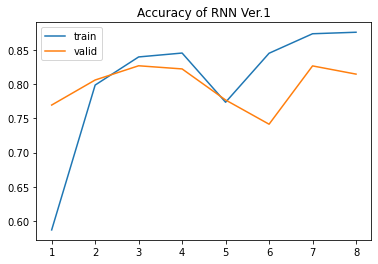

In [ ]:
import matplotlib.pyplot as plt

# Plot the Results
RNN_V1_train = [0.5869, 0.7986,0.8397,0.8454,0.7735,0.8451,0.8736,0.8758]
RNN_V1_valid = [ 0.7694,0.8060,0.8268, 0.8222, 0.7768, 0.7414, 0.8266, 0.8146]
x = [1,2,3,4,5,6,7,8]
plt.title('Accuracy of RNN Ver.1')
plt.plot(x, RNN_V1_train, x, RNN_V1_valid)
plt.legend(['train', 'valid'])
plt.show()

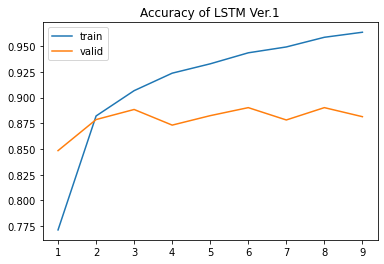

In [ ]:
# Plot the Results
LSTM_V1_train = [0.7713,0.8821,0.9067,0.9237,0.9328,0.9435,0.9492,0.9586,0.9635]
LSTM_V1_valid = [0.8484, 0.8786, 0.8884, 0.8732, 0.8824, 0.8902, 0.8782, 0.8902, 0.8814]
x = [1,2,3,4,5,6,7,8,9]
plt.title('Accuracy of LSTM Ver.1')
plt.plot(x, LSTM_V1_train, x, LSTM_V1_valid)
plt.legend(['train', 'valid'])
plt.show()

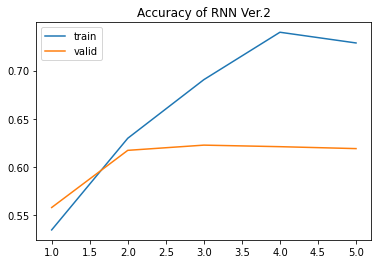

In [ ]:
import matplotlib.pyplot as plt

# Plot the Results
RNN_V2_train = [0.5350,0.6299,0.6906,0.7397,0.7286]
RNN_V2_valid = [ 0.5582, 0.6174, 0.6228, 0.6212, 0.6192]
x = [1,2,3,4,5]
plt.title('Accuracy of RNN Ver.2')
plt.plot(x, RNN_V2_train, x, RNN_V2_valid)
plt.legend(['train', 'valid'])
plt.show()

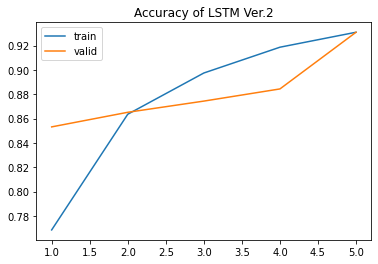

In [ ]:
# Plot the Results
LSTM_V2_train = [0.7685,0.8636,0.8975,0.9187,0.9310]
LSTM_V2_valid = [ 0.8532, 0.8652, 0.8744, 0.8844, 0.9310]
x = [1,2,3,4,5]
plt.title('Accuracy of LSTM Ver.2')
plt.plot(x, LSTM_V2_train, x, LSTM_V2_valid)
plt.legend(['train', 'valid'])
plt.show()